In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('c:/Users/jadha/Data/age_gender.csv')
df.shape

(23705, 5)

In [3]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.gender.value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [5]:
df.race.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: race, dtype: int64

In [6]:
df.age.value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [7]:
px=np.array(df.pixels[0].split(),dtype='int32').reshape(48,48)

In [8]:
48*48

2304

In [9]:
px.shape

(48, 48)

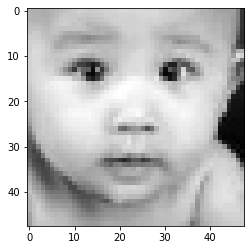

In [10]:
plt.imshow(px,cmap='gray')
plt.show()

In [11]:
df.pixels=df.pixels.apply(lambda x: np.array(x.split(),'int32').reshape(48,48))

In [12]:
df.gender=df.gender.apply(lambda x: 'Male' if x==0 else 'Female' )

In [13]:
race=['White','Black','Ashian','Indian','Other']
df.race=df.race.apply(lambda x: race[x])

In [14]:
df.race.value_counts()

White     10078
Black      4526
Indian     3975
Ashian     3434
Other      1692
Name: race, dtype: int64

In [15]:
df.head()

,age,race,gender,img_name,pixels
0,1,Ashian,Male,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,..."
1,1,Ashian,Male,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ..."
2,1,Ashian,Male,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116..."
3,1,Ashian,Male,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,..."
4,1,Ashian,Male,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,..."


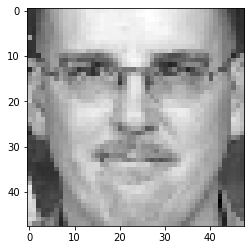

In [16]:
k=np.random.randint(0,23705)
k_df=pd.DataFrame(df.iloc[k])
px=df.pixels[k]
plt.imshow(px,cmap='gray')
# plt.title(k_df[2])
plt.show()

In [19]:
def show_images(rows,cols):
    plt.figure(figsize=[rows*3,cols*3])
    for i in range (1,rows*cols+1):
        plt.subplot(rows,cols,i)
        k=np.random.randint(0,23705)
        px=df.pixels[k]
        plt.imshow(px,cmap='gray')
        plt.title(f"Age:{df.age[k]}  Gender :{df.gender[k]} \n race : {df.race[k]}",color='b')
        plt.axis('off')
    plt.tight_layout()

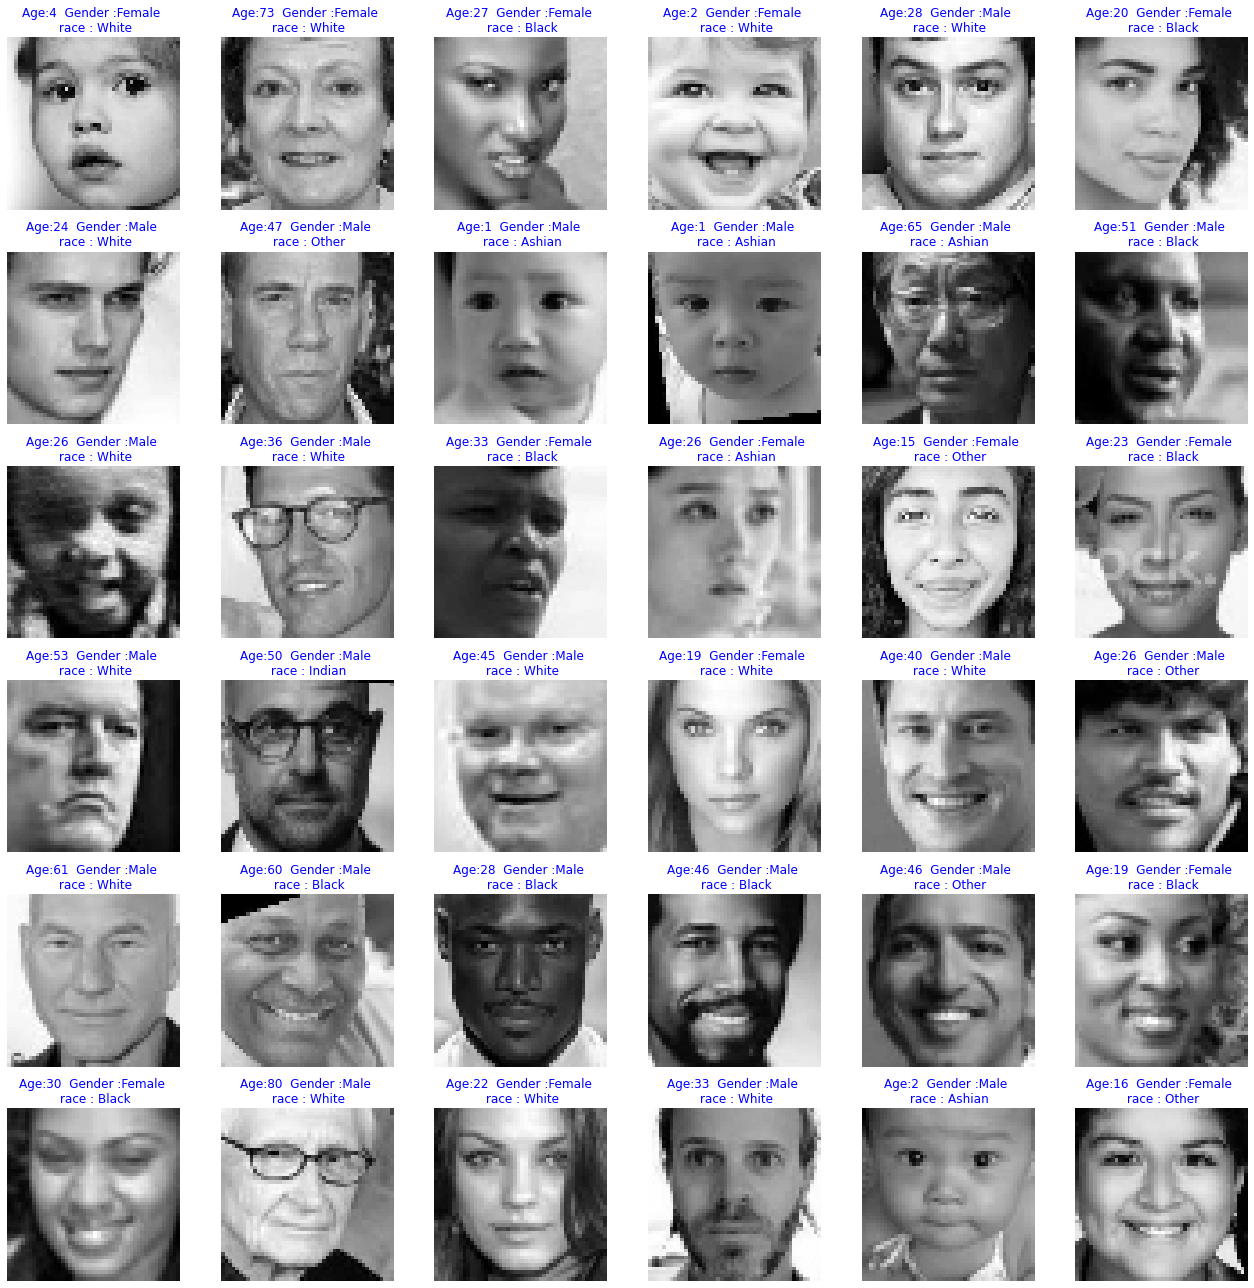

In [20]:
show_images(6,6)

In [21]:
x=np.zeros((23705,48,48))
x[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
for i in range (23705):
    x[i]=df.pixels[i]/255

In [23]:
df.pixels[0]/255

array([[0.50588235, 0.50196078, 0.50196078, ..., 0.4627451 , 0.38823529,
        0.20784314],
       [0.50980392, 0.50588235, 0.50196078, ..., 0.45882353, 0.38431373,
        0.20392157],
       [0.51372549, 0.50588235, 0.50980392, ..., 0.44705882, 0.38039216,
        0.19607843],
       ...,
       [0.4745098 , 0.54117647, 0.57647059, ..., 0.59215686, 0.58823529,
        0.58039216],
       [0.45882353, 0.5372549 , 0.57254902, ..., 0.58431373, 0.58039216,
        0.58039216],
       [0.45098039, 0.52941176, 0.55686275, ..., 0.57254902, 0.57254902,
        0.57254902]])

In [24]:
x[0]

array([[0.50588235, 0.50196078, 0.50196078, ..., 0.4627451 , 0.38823529,
        0.20784314],
       [0.50980392, 0.50588235, 0.50196078, ..., 0.45882353, 0.38431373,
        0.20392157],
       [0.51372549, 0.50588235, 0.50980392, ..., 0.44705882, 0.38039216,
        0.19607843],
       ...,
       [0.4745098 , 0.54117647, 0.57647059, ..., 0.59215686, 0.58823529,
        0.58039216],
       [0.45882353, 0.5372549 , 0.57254902, ..., 0.58431373, 0.58039216,
        0.58039216],
       [0.45098039, 0.52941176, 0.55686275, ..., 0.57254902, 0.57254902,
        0.57254902]])

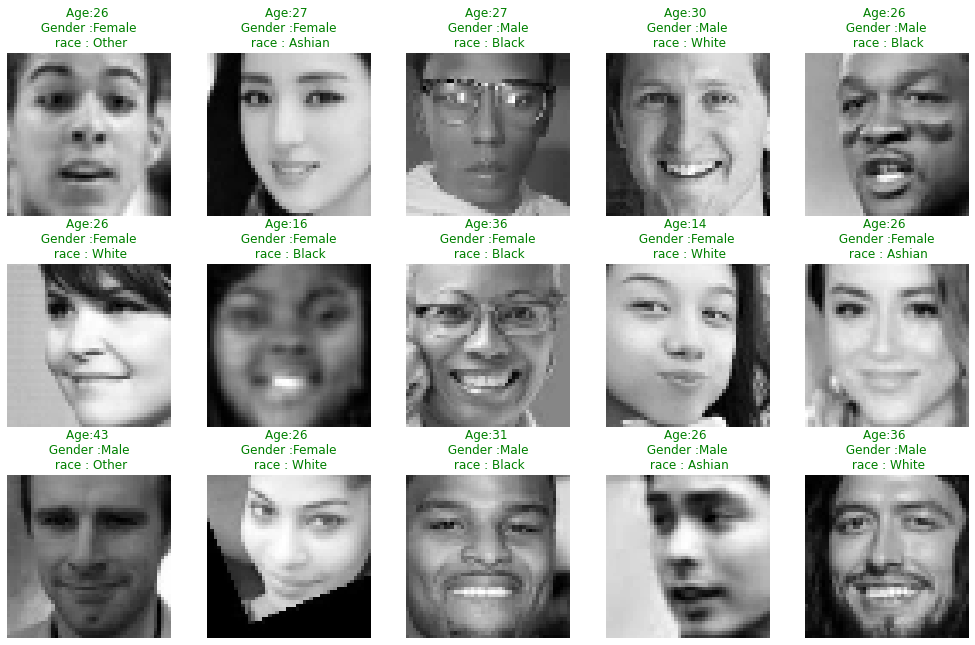

In [25]:
plt.figure(figsize=[14,9])
for i in range (1,16):
    plt.subplot(3,5,i)
    k=np.random.randint(0,23705)
    plt.imshow(x[k],cmap='gray')
    plt.title(f"Age:{df.age[k]} \n Gender :{df.gender[k]} \n race : {df.race[k]}",color='green')
    plt.axis('off')
plt.tight_layout()

In [26]:
x.shape

(23705, 48, 48)

In [27]:
y=df['gender']
y.shape

(23705,)

In [28]:
y=pd.get_dummies(y)
y.shape

(23705, 2)

In [29]:
model =Sequential()

model.add(Flatten(input_shape=(48,48)))

# hiden layer 1

model.add(Dense(100,input_shape=(2304,)))
model.add(Activation('relu'))
#hidden layer 2
model.add(Dense(50))
model.add(Activation('relu'))
# hidden layer 3
model.add(Dense(25))
model.add(Activation('relu'))

#output layer
model.add(Dense(2))
model.add(Activation('sigmoid'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               230500    
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 activation_2 (Activation)   (None, 25)                0

In [30]:
48*48*100+100


230500

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2000)
x_train.shape,x_test.shape

((21705, 48, 48), (2000, 48, 48))

In [40]:
start_time=datetime.now()
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)
end_time=datetime.now()
print(end_time-start_time)

Epoch 1/50
679/679 [==============================] - 4s 4ms/step - loss: 0.4379 - accuracy: 0.8003 - val_loss: 0.5274 - val_accuracy: 0.7590
Epoch 2/50
679/679 [==============================] - 2s 3ms/step - loss: 0.3697 - accuracy: 0.8310 - val_loss: 0.3928 - val_accuracy: 0.8105
Epoch 3/50
679/679 [==============================] - 2s 3ms/step - loss: 0.3499 - accuracy: 0.8414 - val_loss: 0.3489 - val_accuracy: 0.8375
Epoch 4/50
679/679 [==============================] - 2s 3ms/step - loss: 0.3441 - accuracy: 0.8463 - val_loss: 0.3572 - val_accuracy: 0.8275
Epoch 5/50
679/679 [==============================] - 2s 3ms/step - loss: 0.3438 - accuracy: 0.8456 - val_loss: 0.3185 - val_accuracy: 0.8455
Epoch 6/50
679/679 [==============================] - 2s 3ms/step - loss: 0.3377 - accuracy: 0.8455 - val_loss: 0.3571 - val_accuracy: 0.8250
Epoch 7/50
679/679 [==============================] - 2s 3ms/step - loss: 0.3301 - accuracy: 0.8506 - val_loss: 0.3193 - val_accuracy: 0.8540
Epoch 

In [41]:
model.evaluate(x_train,y_train)

679/679 [==============================] - 2s 3ms/step - loss: 0.2580 - accuracy: 0.8848


[0.25801941752433777, 0.8848191499710083]

In [42]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8535


[0.29974210262298584, 0.8535000085830688]

In [43]:
y_pridict=model.predict(x_test)
y_pridict=np.array([np.argmax(i)for i in y_pridict])
y_pridict

63/63 [==============================] - 4s 2ms/step


array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [44]:
y_test

,Female,Male
1538,1,0
8831,1,0
6560,1,0
7959,1,0
12149,0,1
...,...,...
10403,1,0
22222,0,1
2516,0,1
17763,0,1


In [45]:
y_actual=np.array([np.argmax(i) for i in  y_test.values])
y_actual

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [46]:
y_pridict

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## hear 0 and 1 is not a male and female it return the index which contain maximum value

In [47]:
(np.sum(y_pridict==y_actual))/len(y_test)

0.8535

# check random image

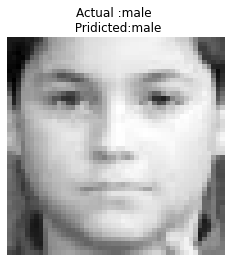

In [48]:
gender=['female','male']
k=np.random.randint(2000)
px=x_test[k]
plt.imshow(px,cmap='gray')
plt.axis('off')
actual_label=gender[y_actual[k]]
pridected_label=gender[y_pridict[k]]

plt.title(f"Actual :{actual_label} \n Pridicted:{pridected_label}")
plt.show()

In [49]:
confusion_matrix(y_actual,y_pridict)

array([[751, 212],
       [ 81, 956]], dtype=int64)

# images from outside the dataset:

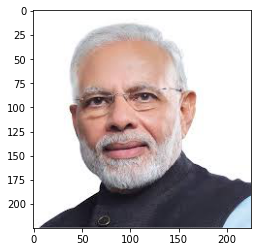

In [51]:
px=plt.imread('c:/Users/jadha/Data/modi1.images.jpg')
plt.imshow(px)
plt.show()

In [54]:
import cv2 as cv
from fer import FER

In [55]:
face_detect=FER()
x,y,w,h=face_detect.find_faces(px)[0]

In [56]:
x,y,w,h

(30, 43, 123, 123)

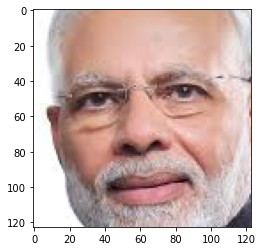

In [57]:
face_px=px[y:y+w,x:x+w]
plt.imshow(face_px)
plt.show()

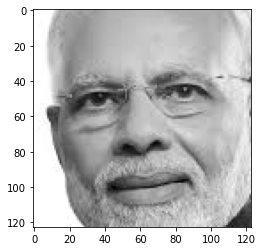

In [58]:
face_px=cv.cvtColor(face_px,cv.COLOR_RGB2GRAY)
plt.imshow(face_px,cmap='gray')
plt.show()

In [59]:
face_px.shape

(123, 123)

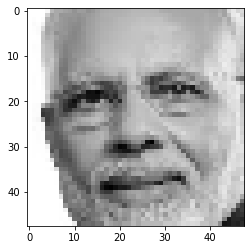

In [60]:
face_px = cv.resize(face_px,(48,48))
plt.imshow(face_px,cmap='gray')
plt.show()

In [61]:
face_px.shape

(48, 48)

In [62]:
face_px=face_px.reshape(1,48,48)
face_px.shape

(1, 48, 48)

In [63]:
model.predict(face_px)

1/1 [==============================] - 0s 121ms/step


array([[0., 1.]], dtype=float32)

In [64]:
gender=['female','male']
pridicted_gender=gender[np.argmax(model.predict(face_px))]

1/1 [==============================] - 0s 30ms/step


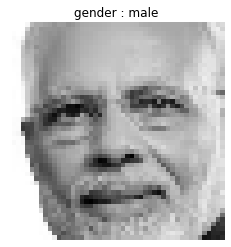

In [65]:
plt.imshow(face_px.reshape(48,48),cmap='gray')
plt.title(f'gender : {pridicted_gender}')
plt.axis('off')
plt.show()

# solve this exampal using decision tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train.reshape(21705,2304),y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
clf.score(x_test.reshape(2000,2304),y_test)

0.736

In [68]:
clf.predict(x_test.reshape(2000,2304))

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)